In [2]:
import sys
import os
import typing as tp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent  
base_data_dir = project_root / 'data'
data_dir = base_data_dir / 'raw'
plots_dir = project_root / 'results' / 'plots'

print(f"Data directory exists: {data_dir.exists()}")
print(f"Plots directory exists: {plots_dir.exists()}")

Data directory exists: True
Plots directory exists: True


In [4]:
industry_file = data_dir / 'DOL_data.csv'
if industry_file.exists():
    data = pd.read_csv(industry_file)
    print(data.head())
else:
    print(f"State data not found at {industry_file}")

  BMRK YR  ST  AREA INDUSTRY TITLE  SERIES  DATA TYPE CODE DATA TYPE  YEAR  \
0  2023-1   9     0  Total Nonfarm       0               1        AE  1990   
1  2023-1   9     0  Total Nonfarm       0               1        AE  1991   
2  2023-1   9     0  Total Nonfarm       0               1        AE  1992   
3  2023-1   9     0  Total Nonfarm       0               1        AE  1993   
4  2023-1   9     0  Total Nonfarm       0               1        AE  1994   

      JAN     FEB  ...     APR     MAY     JUN     JUL     AUG     SEP  \
0  1629.9  1621.4  ...  1630.9  1642.7  1654.1  1619.8  1610.8  1629.6   
1  1572.6  1557.5  ...  1570.7  1576.6  1586.0  1550.3  1542.9  1563.1   
2  1516.5  1511.5  ...  1530.1  1539.7  1548.9  1531.8  1522.5  1544.0   
3  1521.2  1521.7  ...  1526.3  1538.1  1546.7  1527.0  1520.2  1547.0   
4  1514.3  1511.4  ...  1544.2  1554.3  1567.9  1546.4  1542.8  1568.7   

      OCT     NOV     DEC  AVERAGE  
0  1618.0  1619.2  1619.9   1627.5  
1  1562.4  1

In [5]:
# Make all column names lowercase
data.columns = [col.lower() for col in data.columns]

In [6]:
# Drop multiple columns
data = data.drop(['bmrk yr', 'st', 'series','area', 'data type code', 'data type'], axis=1)

In [7]:
df = data.copy()

In [8]:
# Group by industry and year, then calculate the mean for each year
annual_data = df.groupby(['industry title', 'year']).mean()

In [9]:
annual_data

jan   feb   mar   apr   may   jun  \
industry title                     year                                       
Accommodation                      1990  12.1  11.9  12.1  12.4  12.8  13.2   
                                   1991  10.0   9.8  10.0  10.3  10.8  11.4   
                                   1992   9.5   9.7   9.7   9.8  10.3  10.8   
                                   1993   9.3   9.3   9.4   9.9  10.4  11.0   
                                   1994   9.6   9.7   9.8  10.1  10.3  11.0   
...                                       ...   ...   ...   ...   ...   ...   
Wholesale Trade Agents and Brokers 2020   6.9   6.9   6.8   6.6   6.5   6.5   
                                   2021   6.4   6.3   6.3   6.3   6.3   6.3   
                                   2022   6.3   6.3   6.3   6.3   6.3   6.4   
                                   2023   6.2   6.3   6.2   6.2   6.2   6.2   
                                   2024   6.0   5.9   6.0   6.0   6.1   6.1   

                                          jul   aug   sep   oct   nov   dec  \
industry title                     year                                       
Accommodation                      1990  13.8  13.6  12.6  11.9  11.7  11.6   
                                   1991  11.7  11.8  10.8  10.7  10.4  10.2   
                                   1992  11.5  11.8  10.5  10.6  10.1   9.9   
                                   1993  11.9  12.1  10.7  10.9  10.5  10.2   
                                   1994  11.9  12.3  11.1  10.8  10.3  10.1   
...                                       ...   ...   ...   ...   ...   ...   
Wholesale Trade Agents and Brokers 2020   6.5   6.5   6.4   6.4   6.4   6.4   
                                   2021   6.4   6.4   6.3   6.4   6.3   6.3   
                                   2022   6.5   6.4   6.4   6.4   6.4   6.3   
                                   2023   6.2   6.2   6.1   6.2   6.1   6.1   
                                   2024   NaN   NaN   NaN   NaN   NaN   NaN   

                                         average  
industry title                     year           
Accommodation                      1990     12.5  
                                   1991     10.7  
                                   1992     10.4  
                                   1993     10.5  
                                   1994     10.6  
...                                          ...  
Wholesale Trade Agents and Brokers 2020      6.6  
                                   2021      6.3  
                                   2022      6.4  
                                   2023      6.2  
                                   2024      6.0  

[3370 rows x 13 columns]

In [10]:
df_t = df.copy()
df_t['date'] = pd.to_datetime(df_t['year'], format='%Y')
df_t.set_index('date', inplace=True)

In [11]:
df_t

,industry title,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,average
date,,,,,,,,,,,,,,,
1990-01-01,Total Nonfarm,1990,1629.9,1621.4,1633.1,1630.9,1642.7,1654.1,1619.8,1610.8,1629.6,1618.0,1619.2,1619.9,1627.5
1991-01-01,Total Nonfarm,1991,1572.6,1557.5,1567.3,1570.7,1576.6,1586.0,1550.3,1542.9,1563.1,1562.4,1566.0,1569.2,1565.4
1992-01-01,Total Nonfarm,1992,1516.5,1511.5,1519.8,1530.1,1539.7,1548.9,1531.8,1522.5,1544.0,1547.5,1552.3,1555.1,1535.0
1993-01-01,Total Nonfarm,1993,1521.2,1521.7,1525.5,1526.3,1538.1,1546.7,1527.0,1520.2,1547.0,1554.9,1561.7,1569.0,1538.3
1994-01-01,Total Nonfarm,1994,1514.3,1511.4,1523.7,1544.2,1554.3,1567.9,1546.4,1542.8,1568.7,1575.5,1582.9,1587.2,1551.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,Local Government,2020,3.6,3.6,3.5,3.4,3.4,2.8,3.0,3.1,3.4,3.4,3.5,3.5,3.4
2021-01-01,Local Government,2021,3.4,3.4,3.4,3.4,3.5,3.4,3.1,3.2,3.4,3.5,3.5,3.5,3.4
2022-01-01,Local Government,2022,3.6,3.6,3.6,3.5,3.6,3.6,3.1,3.1,3.5,3.6,3.7,3.6,3.5


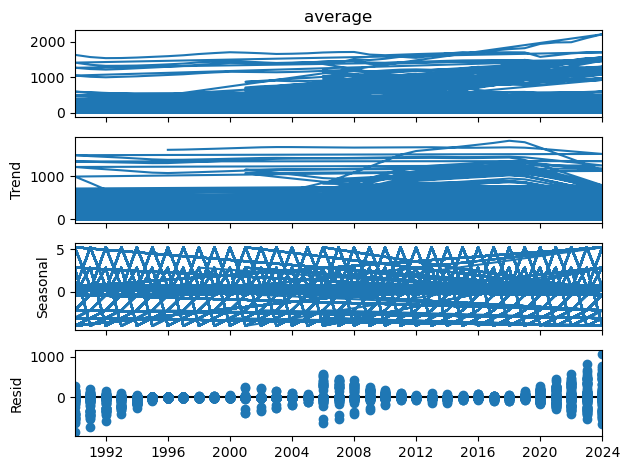

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_t['average'], model='additive', period=12)
result.plot()
plt.show()


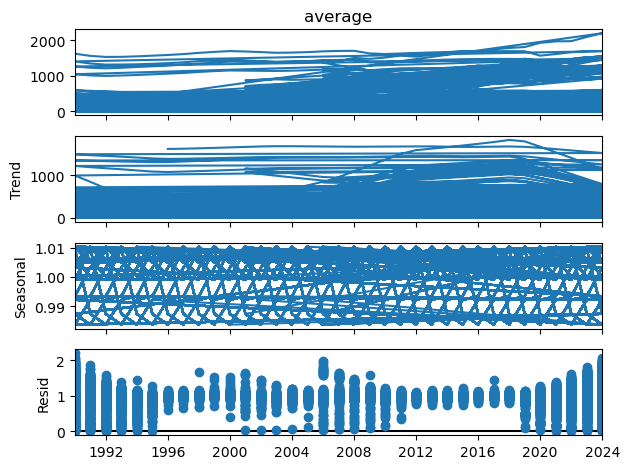

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result_mult = seasonal_decompose(df_t['average'], model='multiplicative', period=12)
result_mult.plot()
plt.show()


/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

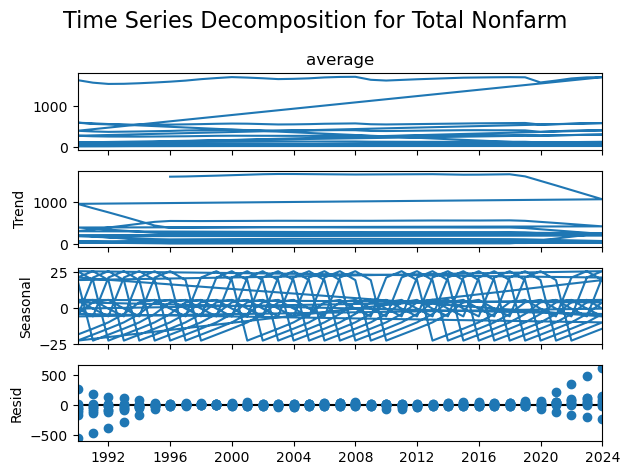

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

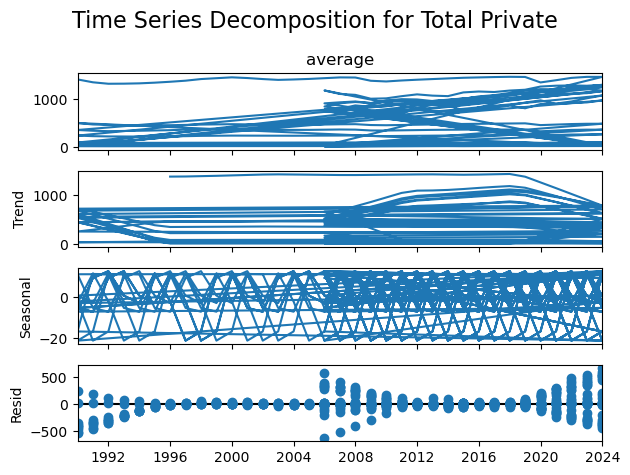

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

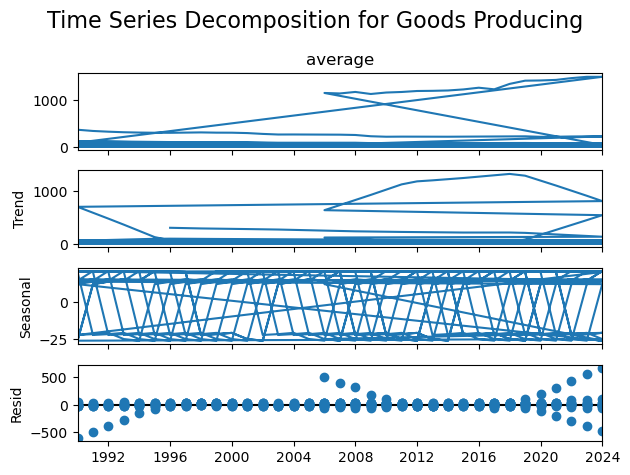

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

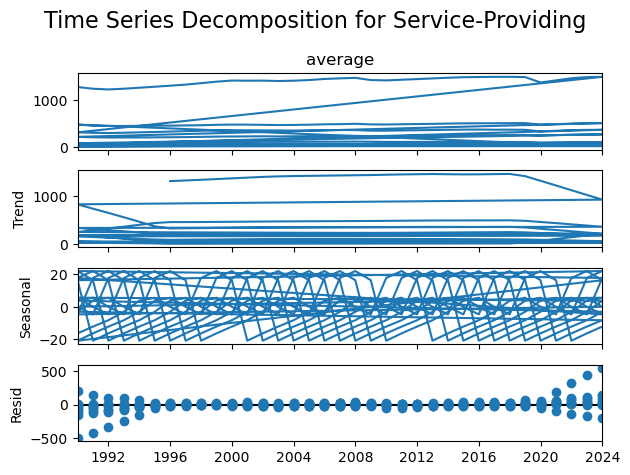

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

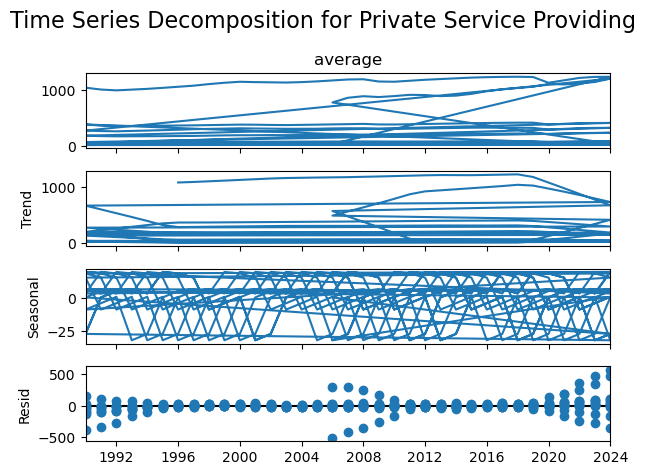

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

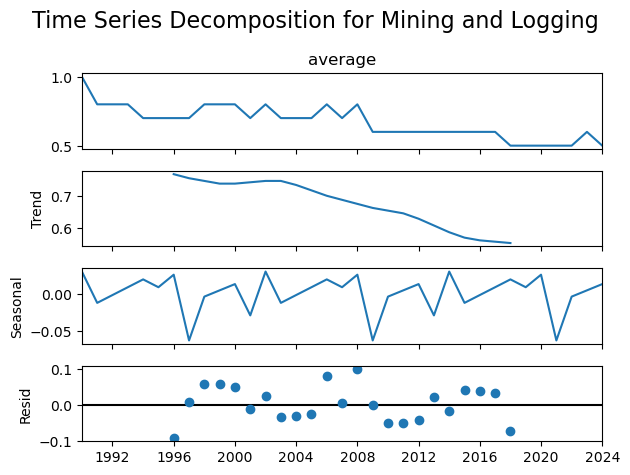

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

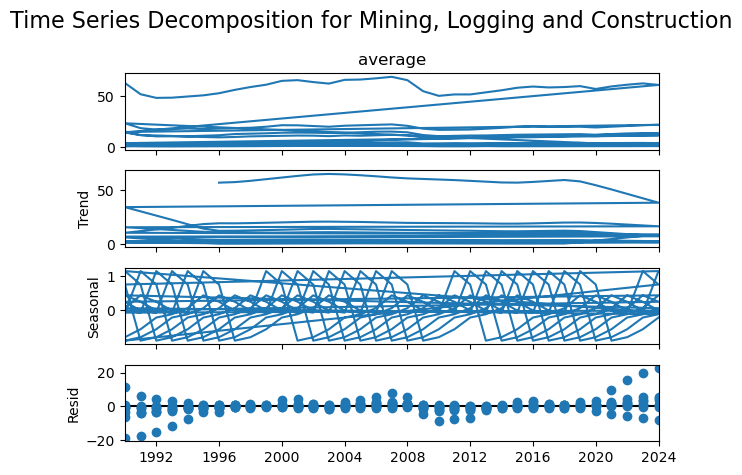

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

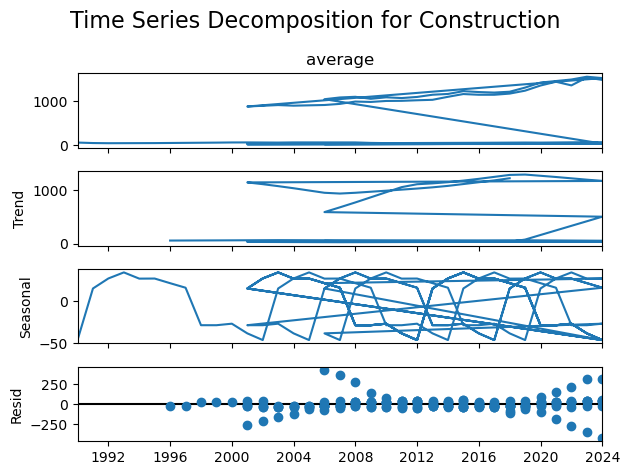

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

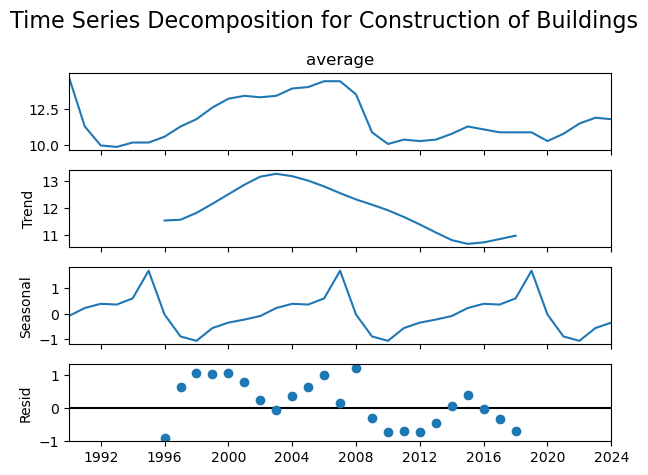

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

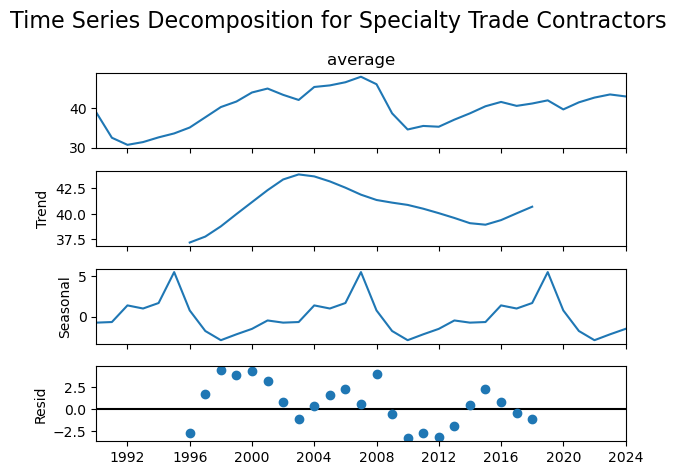

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

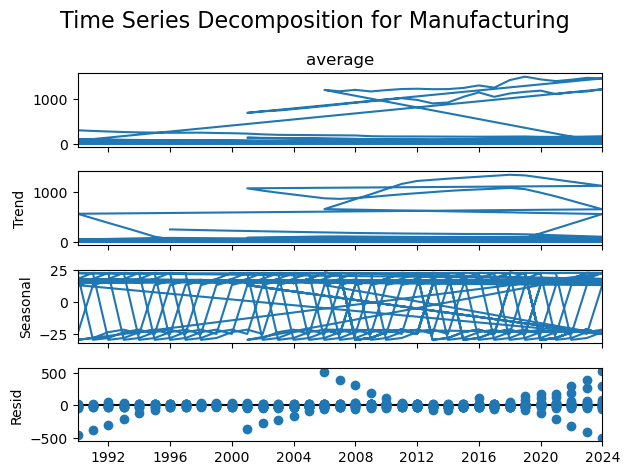

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

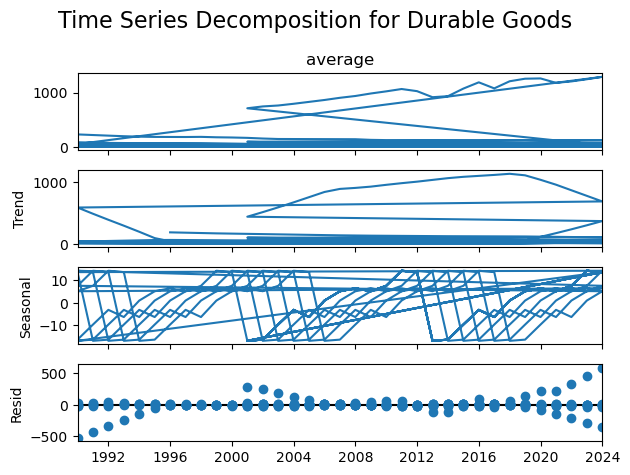

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

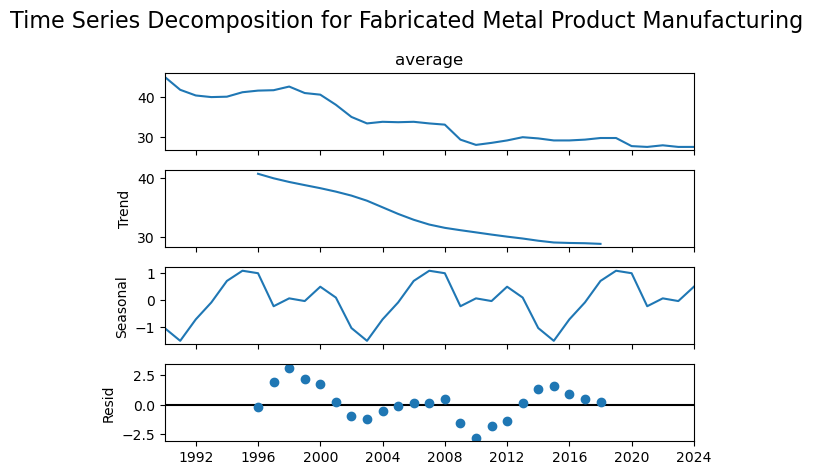

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

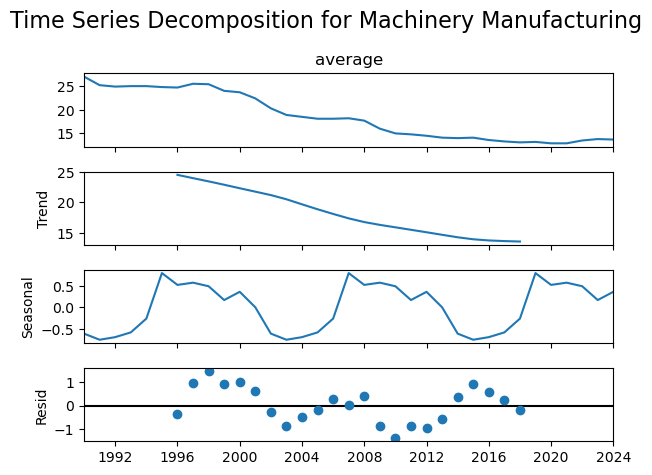

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

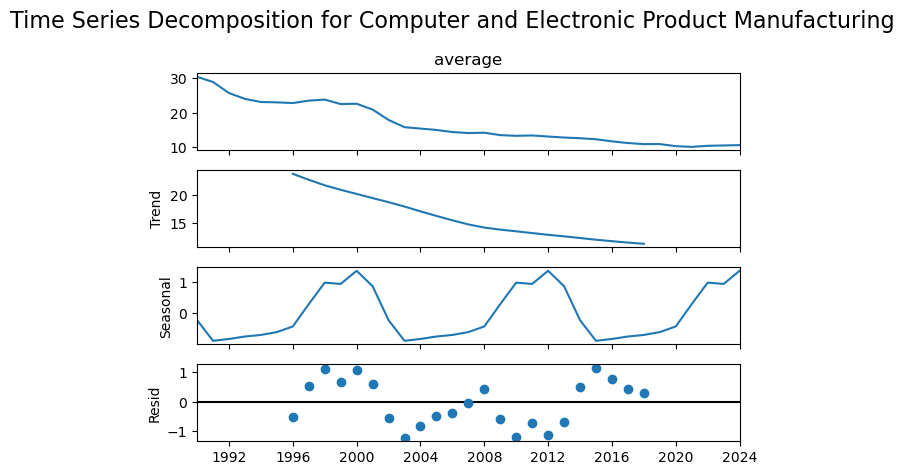

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

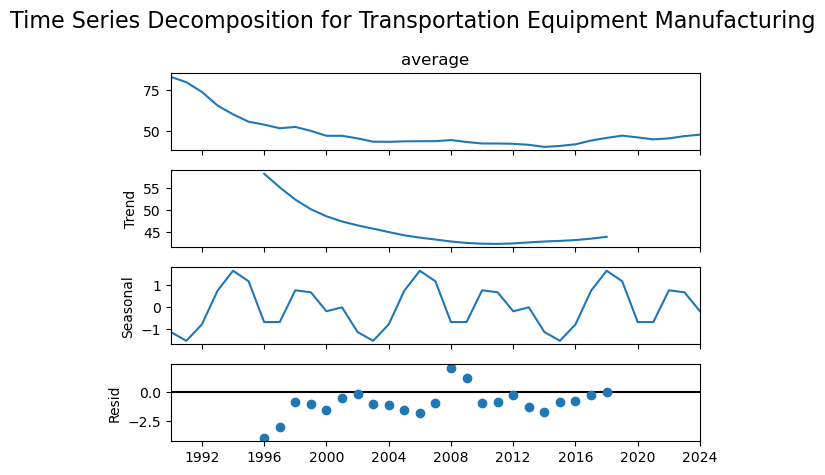

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

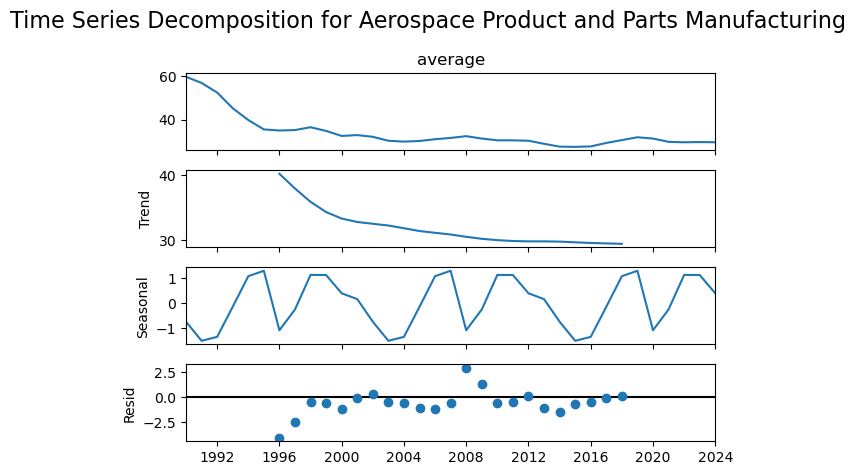

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

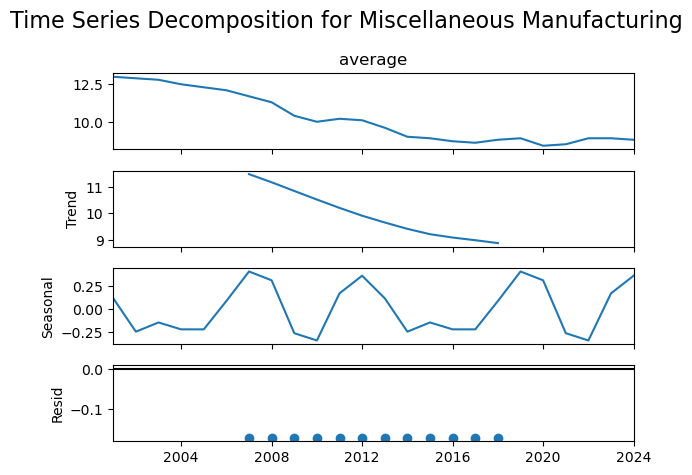

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

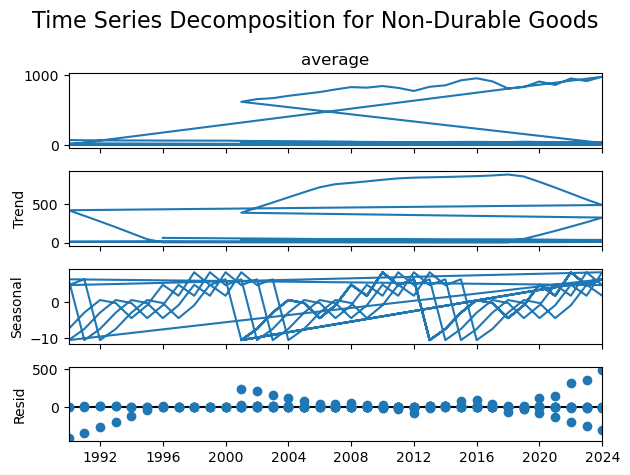

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

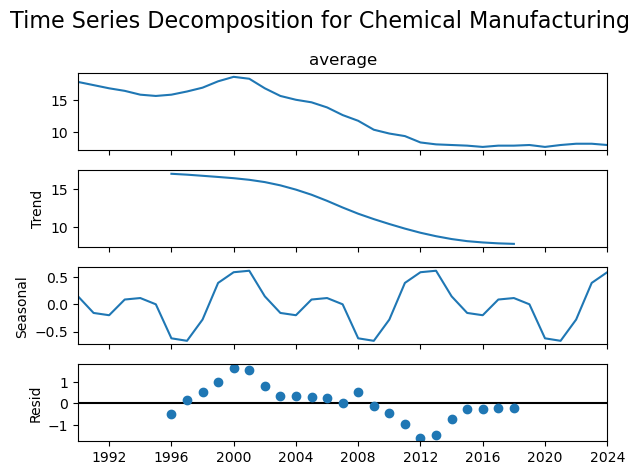

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

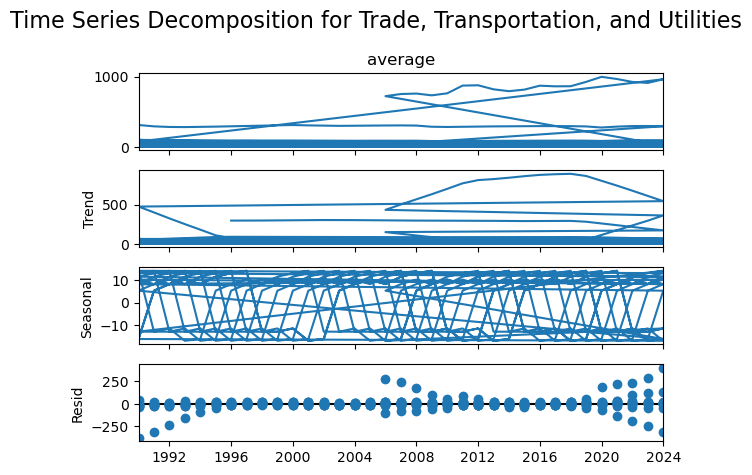

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

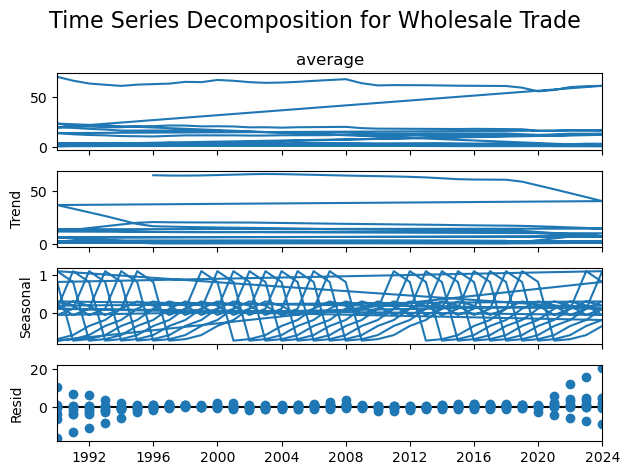

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

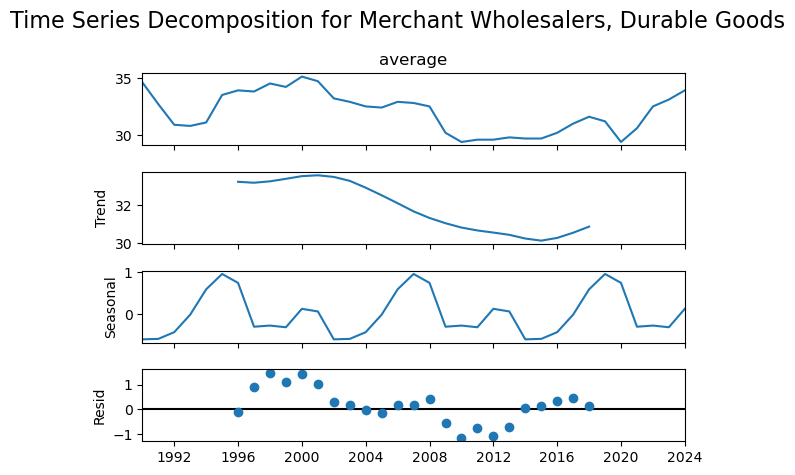

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

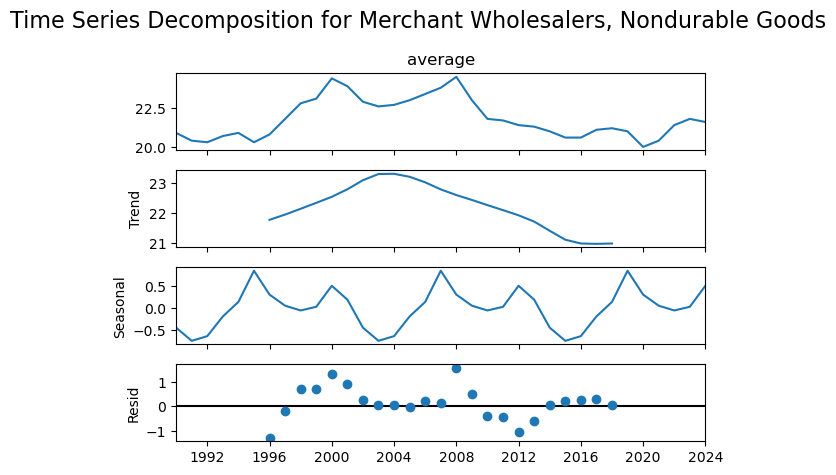

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

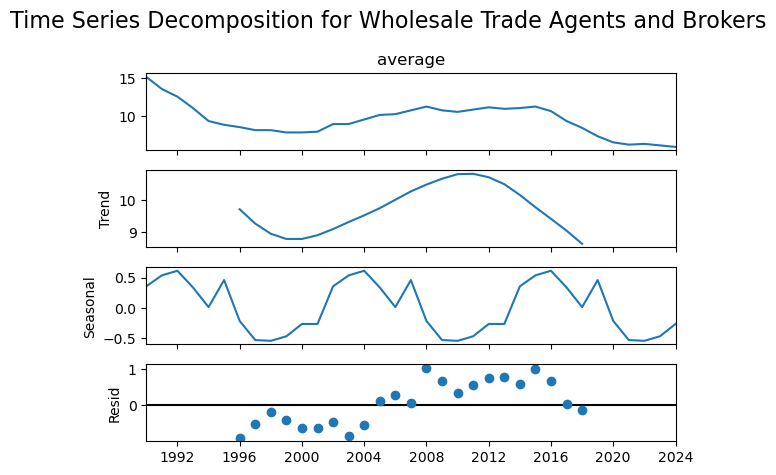

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

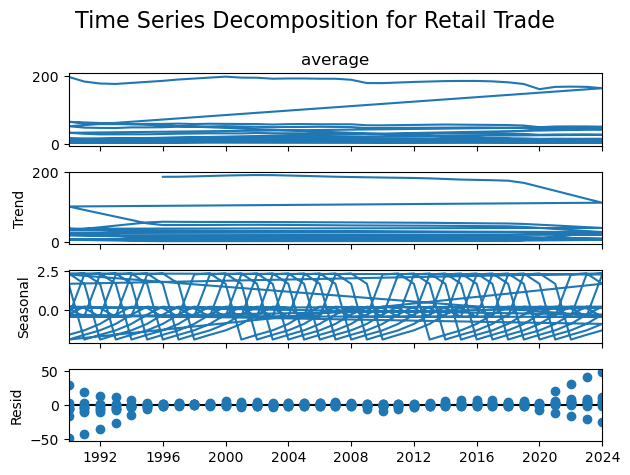

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

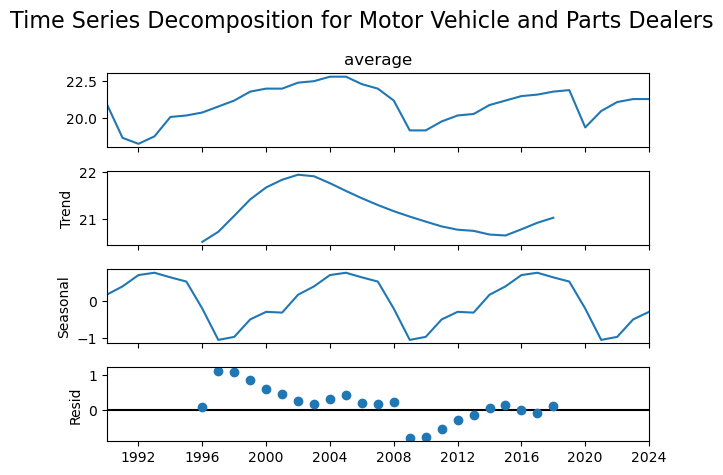

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

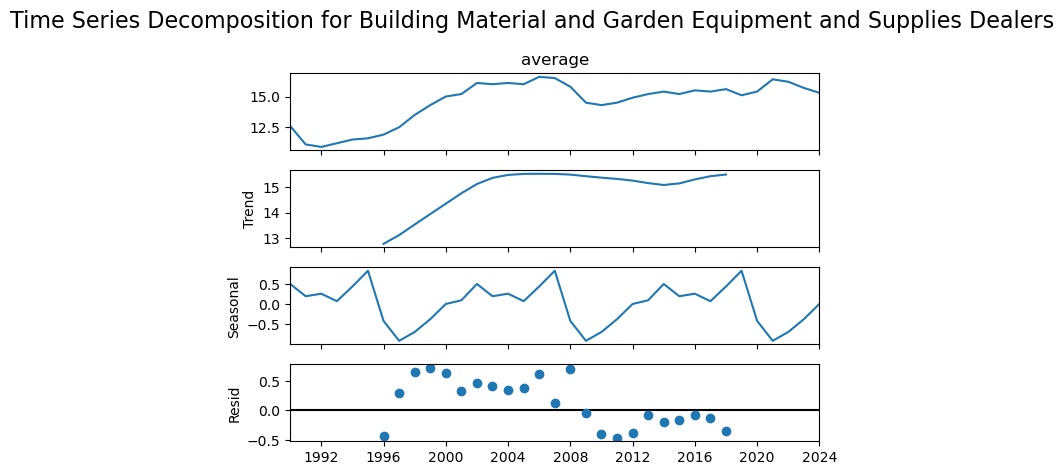

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

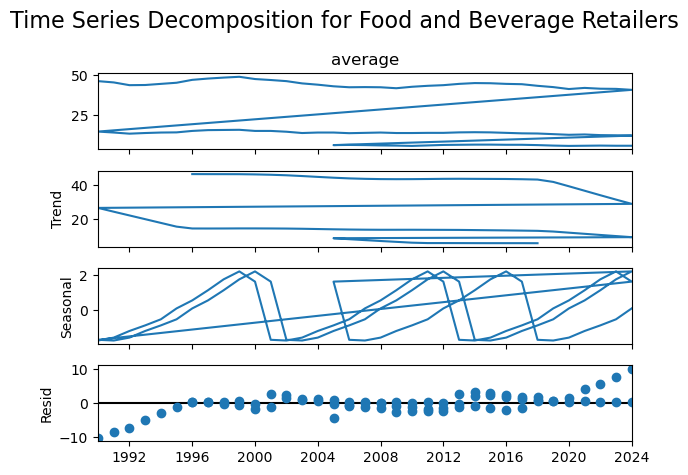

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

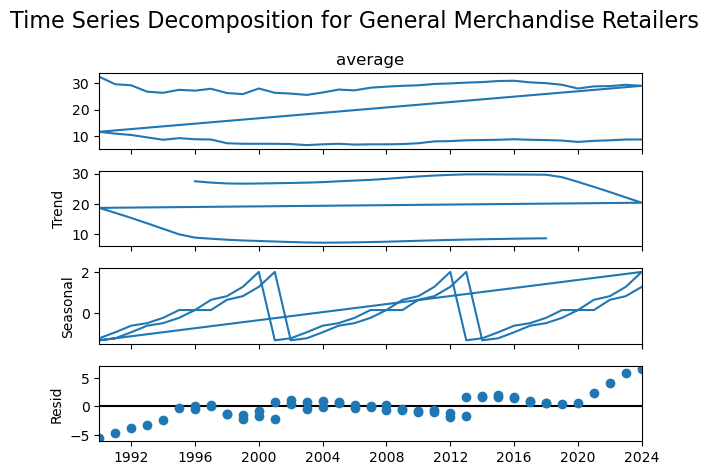

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

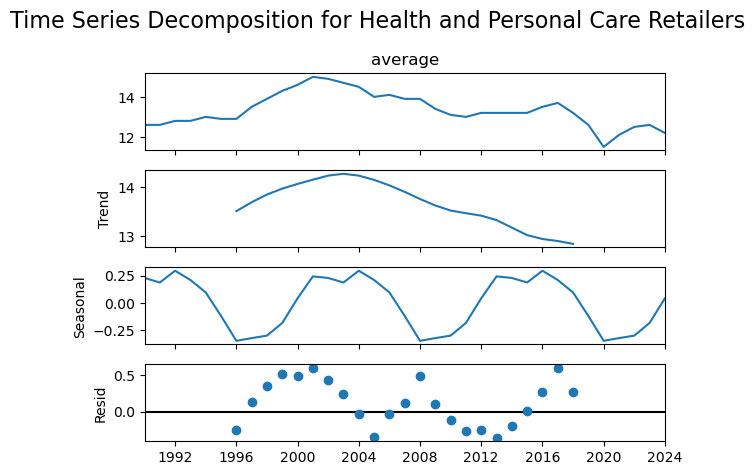

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

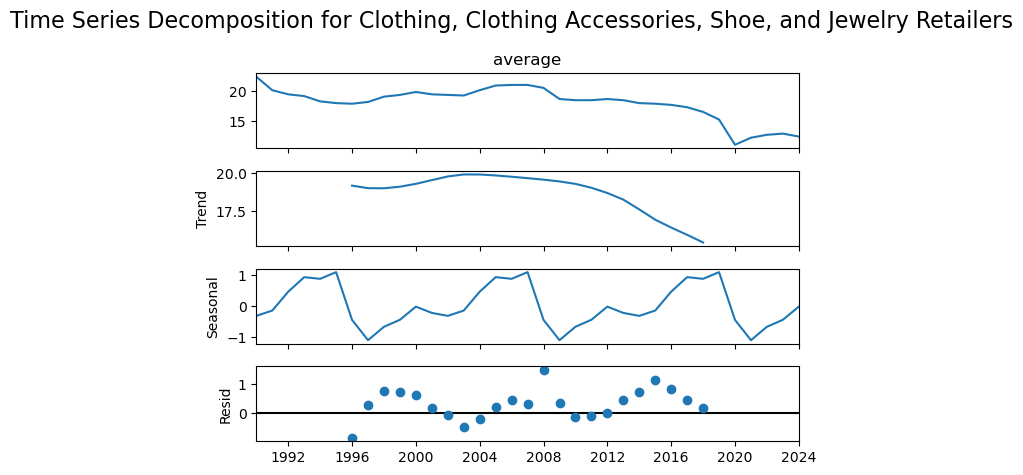

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

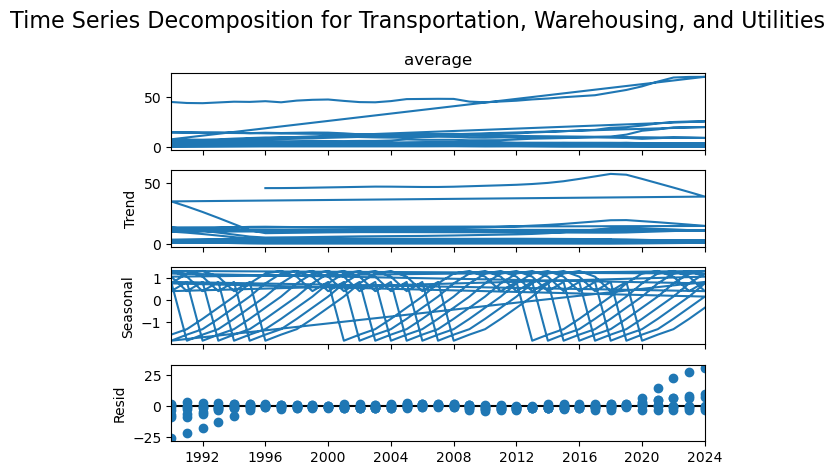

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

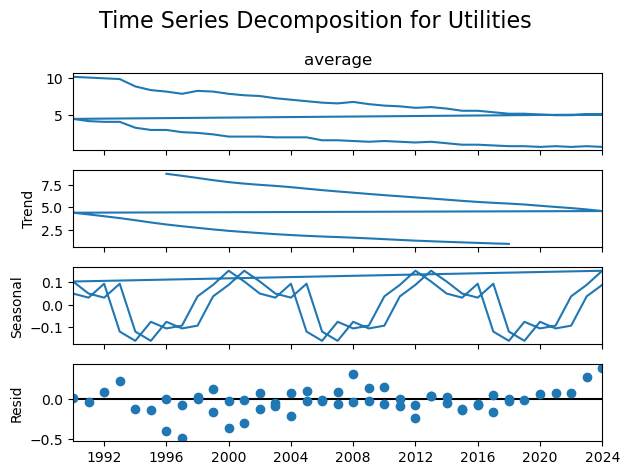

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

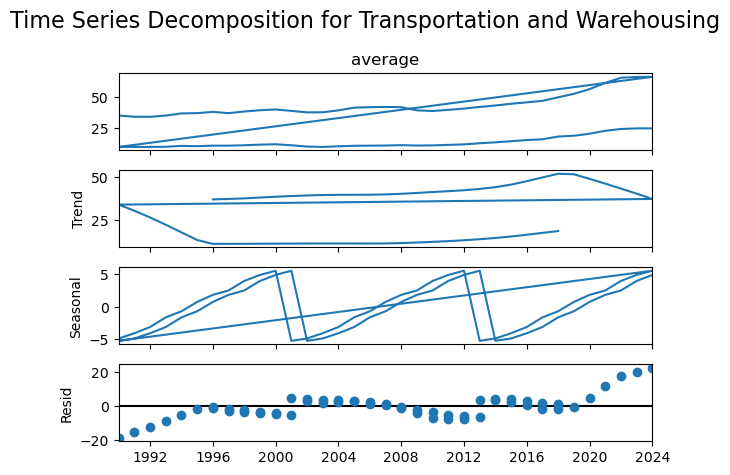

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

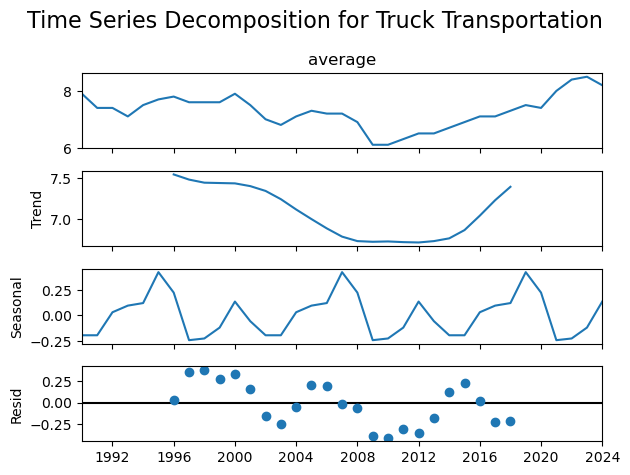

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

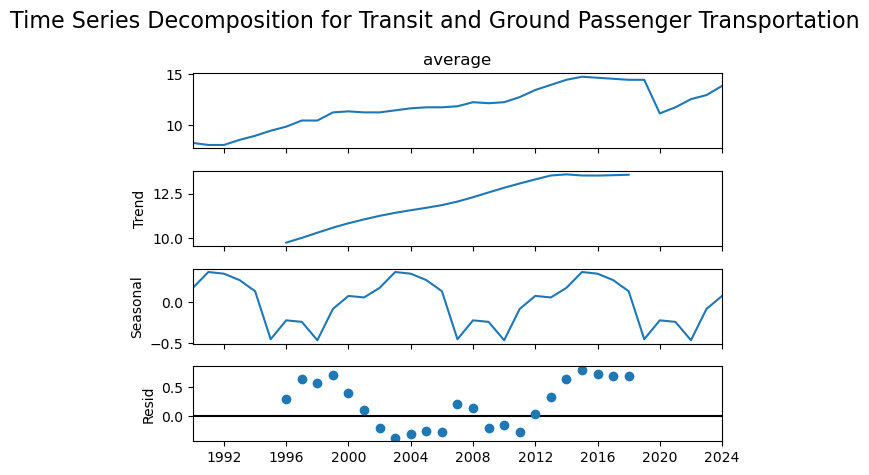

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


<Figure size 1000x800 with 0 Axes>

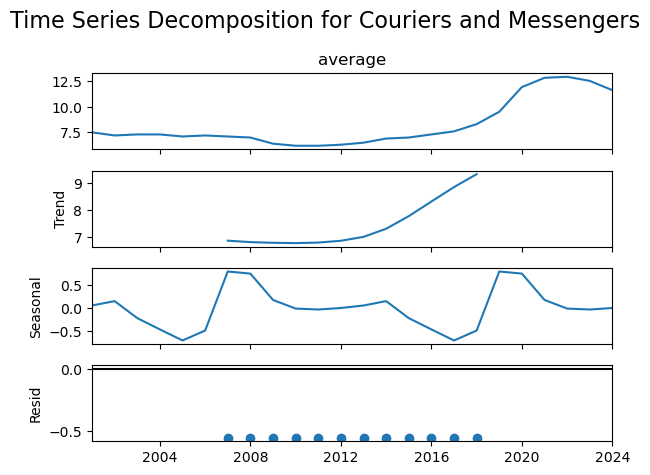

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_47504/55178763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')


ValueError: x must have 2 complete cycles requires 24 observations. x only has 22 observation(s)

In [14]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# list of unique industries
unique_industries = df_t['industry title'].unique()

# Iterate through each industry
for industry in unique_industries:
    # Filtere for the current industry
    industry_df = df_t[df_t['industry title'] == industry]

    # Set the 'year' column as a datetime index
    industry_df['date'] = pd.to_datetime(industry_df['year'], format='%Y')
    industry_df.set_index('date', inplace=True)

    #  'average' column is present and drop NaN values
    if 'average' in industry_df.columns:
        industry_series = industry_df['average'].dropna()

        # Perform seasonal decomposition
        result = seasonal_decompose(industry_series, model='additive', period=12)

        # Plot the decomposition for the current industry
        plt.figure(figsize=(10, 8))
        result.plot()
        plt.suptitle(f'Time Series Decomposition for {industry}', fontsize=16)
        plt.tight_layout()
        plt.show()

In [15]:
df_t['growth_rate'] = df_t['average'].pct_change()  # Calculate growth rate


In [16]:
# Create a subset DataFrame with industries and their growth rates per year
subset_df_t = df_t[['industry title', 'year', 'growth_rate']].dropna()  # Drop NaN values caused by pct_change()

In [17]:
subset_df_t

,industry title,year,growth_rate
date,,,
1991-01-01,Total Nonfarm,1991,-0.038157
1992-01-01,Total Nonfarm,1992,-0.019420
1993-01-01,Total Nonfarm,1993,0.002150
1994-01-01,Total Nonfarm,1994,0.008646
1995-01-01,Total Nonfarm,1995,0.011408
...,...,...,...
2020-01-01,Local Government,2020,-0.028571
2021-01-01,Local Government,2021,0.000000
2022-01-01,Local Government,2022,0.029412
